In [64]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

## A: Plot the Lennard-Jones Potential ## 

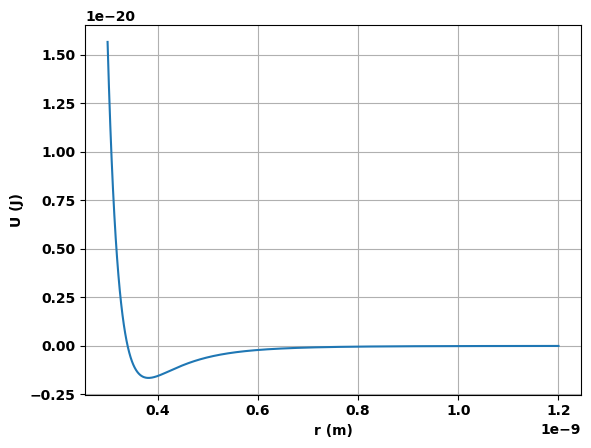

In [65]:
def LennardJ(r):
    eps=1.65e-21
    sig=3.4e-10
    U=4*(eps)*((sig/r)**(12)-(sig/r)**(6))
    return U
r_space=np.linspace(3e-10,12e-10,1000)
plt.plot(r_space,LennardJ(r_space))
plt.xlabel("r (m)")
plt.ylabel("U (J)")
plt.grid(True)

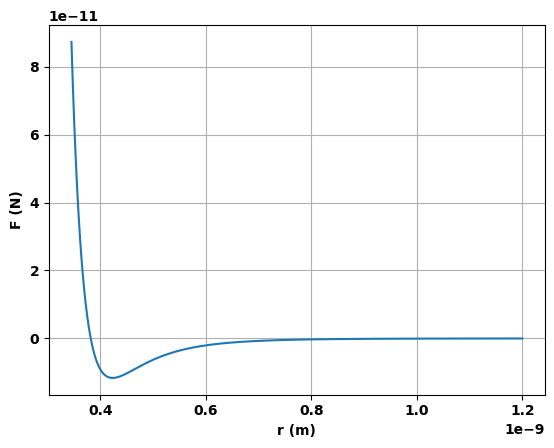

In [66]:
#F=-grad(U)=-dU/dr
def Lennard_force(r):
    eps=1.65e-21
    sig=3.4e-10
    F=((-24*eps*(sig**6))/r**7)*(1-2*(sig/r)**6)
    return F
plt.plot(r_space[50:],Lennard_force(r_space[50:]))
#plt.plot(r_space,Lennard_force(r_space))
plt.xlabel("r (m)")
plt.ylabel("F (N)")
plt.grid(True)
#r_0=sigma*(2**(1/6))


## B ##

In [67]:
def pos1(pos0,vel0,a0,dt):
    return pos0+vel0*dt+0.5*a0*(dt**2)
def vel1(vel0,a1,a0,dt):
    return vel0+0.5*(a1+a0)*(dt**2)

In [68]:
def Nearest_Instance(pos_i,pos_j,L_a):
    dx=pos_i-pos_j
    if dx>0.5*L_a:
        dx=dx-L_a
    elif dx<-0.5*L_a:
        dx=dx+L_a
    return -dx

In [69]:
x = [1.09, 3.12, 0.08, 0.54, 2.52, 3.03, 4.25, 0.89, 2.76, 3.14, 0.23, 1.91, 4.77, 5.1, 4.97, 3.9]
y = [0.98, 5.25, 2.38, 4.08, 4.39, 2.94, 3.01, 3.11, 0.31, 1.91, 5.71, 2.46, 0.96, 4.63, 5.88, 0.2]
v_x = [-0.33, 0.12,-0.09,-1.94, 0.75, 1.7, 0.84,-1.04, 1.64, 0.38,-1.58,-1.55,-0.23,-0.31, 1.18, 0.46]
v_y = [0.78,-1.19,-0.1,-0.56, 0.34,-1.08, 0.47, 0.06, 1.36,-1.24, 0.55,-0.16,-0.83, 0.65, 1.48,-0.53]
print(np.sum(v_x))
print(np.sum(v_y))

-8.881784197001252e-16
4.440892098500626e-16


In [70]:
def Distances_to_Nearests(positions,L=6):
    #calccount is to ensure we are only running the function half the times
    calccount=0
    #By doing as a function, reduces the number of variables in global scope
    nx1=np.zeros((len(positions),len(positions)))
    #Zeros is more predicatable and typically more efficient than empty
    #print(nx1)
    for i in range(0,len(nx1)):
        for j in range(0,len(nx1[i])):
            if i==j:
                nx1[i][j]=np.nan
                #Would prefer do to string but dtype of np.zeroes is float
            else:
                if np.abs(nx1[i][j])<1e-4:
                    #Cant really equate with floats so this checks if the number has not been changed and therefore written
                    dist_x=Nearest_Instance(positions[i],positions[j],L)
                    calccount+=1
                    nx1[i][j]=dist_x
                    nx1[j][i]=-dist_x
                else:
                    if nx1[i][j]!=-nx1[j][i]:
                        print(i,j)
                        print(nx1[i][j],nx1[j,i])
                        print("Something has gone wrong")
    #print(calccount)
    nx1[-1][-1]=np.nan
    return nx1

In [71]:
nx2=Distances_to_Nearests(x)
ny2=Distances_to_Nearests(y)
#Im not sure yet why the last of each isnt getting turned to nan
nx2[15][15]=np.nan
ny2[15][15]=np.nan
#print(ny2)

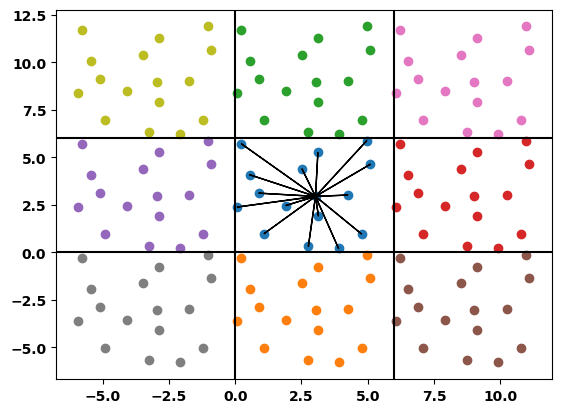

In [72]:
plt.scatter(x,y)
plt.scatter(x,[m-6 for m in y])
plt.scatter(x,[m+6 for m in y])
plt.scatter([m+6 for m in x],y)
plt.scatter([m-6 for m in x],y)
plt.scatter([m+6 for m in x],[m-6 for m in y])
plt.scatter([m+6 for m in x],[m+6 for m in y])
plt.scatter([m-6 for m in x],[m-6 for m in y])
plt.scatter([m-6 for m in x],[m+6 for m in y])
plt.axvline(x=6,color='black')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.axhline(y=6,color='black')

for i in range(0,len(nx2[5])):
    plt.arrow(x[5],y[5],nx2[5][i],ny2[5][i])

In [73]:
def Force_calc(dx,dy):
    r=np.sqrt((dx)**2+(dy)**2)
    F_tot=((-24/r**7))*(1-2*(r**(6)))
    F_x=F_tot*(dx/r)
    F_y=F_tot*(dy/r)
    return F_x,F_y
def Pot_calc(dx,dy):
    r=np.sqrt((dx)**2+(dy)**2)
    u=4*(r**(-12)-r**(-6))
    return u
    

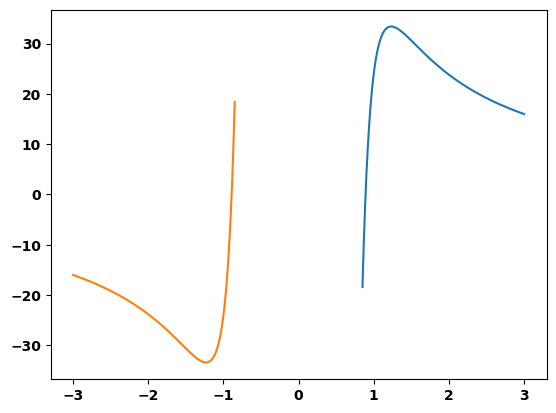

In [74]:
r_test_space=np.linspace(0.85,3,10000)
plt.plot(r_test_space,Force_calc(np.zeros(len(r_test_space)),r_test_space)[1])
r_test_space_neg=np.linspace(-3,-0.85,10000)
plt.plot(r_test_space_neg,Force_calc(np.zeros(len(r_test_space_neg)),r_test_space_neg)[1])
#plt.ylim(0,1e+5)

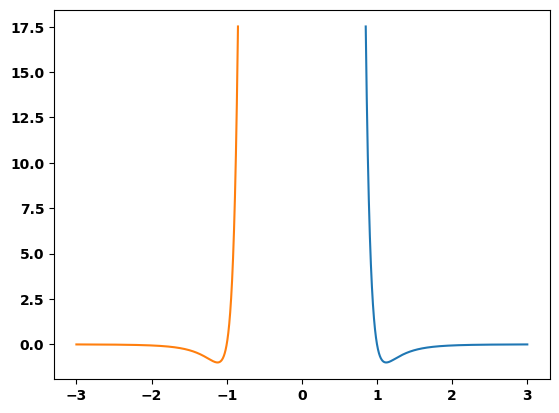

In [75]:
plt.plot(r_test_space,Pot_calc(np.zeros(len(r_test_space)),r_test_space))
plt.plot(r_test_space_neg,Pot_calc(np.zeros(len(r_test_space_neg)),r_test_space_neg))

In [76]:
def Net_Force_U_Calc(dxs,dys):
    calccount=0
    x_forces=np.zeros(np.shape(dxs))
    y_forces=np.zeros(np.shape(dys))
    U_array=np.zeros(np.shape(dxs))
    for i in range(0,len(dxs)):
        for j in range (0,len(dxs[i])):
            if (dxs[i][j]!=np.nan) & (dys[i][j]!=np.nan)&(np.abs(x_forces[i][j])<1e-4)&(np.abs(y_forces[i][j])<1e-4):
                #print(i,j)
                F_x,F_y=Force_calc(dxs[i][j],dys[i][j])
                Pot=Pot_calc(dxs[i][j],dys[i][j])
                calccount+=1
                #It looks like its counting a few too many times? Should be 120 but is doing 136
                x_forces[i][j]=F_x
                x_forces[j][i]=-F_x
                y_forces[i][j]=F_y
                y_forces[j][i]=-F_y
                U_array[i][j]=Pot
                U_array[j][i]=Pot

    #print(calccount)
    Net_x_Forces=[np.nansum(el) for el in x_forces]
    Net_y_Forces=[np.nansum(el) for el in y_forces]
    Net_Potentials=[np.nansum(el) for el in U_array]
    return Net_x_Forces,Net_y_Forces,Net_Potentials



In [77]:
xf,yf,Pots=Net_Force_U_Calc(nx2,ny2)
print(Pots)
#print(xf)

[-0.8708932867353261, -2.799922222824803, -1.5541153249346946, -1.3244063620283224, -1.3898647295763749, -2.7216006066856053, -1.4397365087863956, -2.6020116294914706, -2.5146547235282988, -1.892257838131811, -1.6057244383160447, -2.7093065978479207, -2.381070308874302, -1.6143328556215184, -3.642082098642304, -4.026647642826269]


In [78]:
def Mover(Posx0,Posy0,v_x0,v_y0,tmax,dt=0.01,L=6):
    Tot_Pots=[]
    Tot_kin=[]
    Left_nums=[]
    x_array=[]
    y_array=[]
    vx_array=[]
    vy_array=[]
    #The : in the following statements are to make copies to prevent changing original
    x0=Posx0[:]
    y0=Posy0[:]
    vx0=v_x0[:]
    vy0=v_y0[:]
    ax0=np.zeros(len(Posx0))
    ay0=np.zeros(len(Posx0))
    ax1=np.zeros(len(Posx0))
    ay1=np.zeros(len(Posx0))
    t=0
    while t<tmax:
        #print(x0)
        #print(x_array)
        #Get nearest distances
        dxs=Distances_to_Nearests(x0,L)
        dys=Distances_to_Nearests(y0,L)
        #Get x,y net forces and potential
        xf,yf,FPots=Net_Force_U_Calc(dxs,dys)
        Tot_Pots.append(np.nansum(FPots))
        #print(Tot_Pots)
        #Get kinetic energy
        Tot_kin.append(np.sum([0.5*v**2 for v in vx0]+[0.5*v**2 for v in vy0]))
        #Get number of molecules on left side
        Left_num=len([x for x in x0 if 0<=x<=L/2])
        Left_nums.append(Left_num)
        #prep for movement by noting current values 
        x_array.append(x0)
        #print(x_array)
        #print(x0)
        y_array.append(y0)
        vx_array.append(vx0)
        vy_array.append(vy0)
        #movement
        ax1=xf[:]
        ay1=yf[:]
        #This copy stuff was found to be needed due to way python decides to work in terms of value by reference
        #The issue was that it was computing the new values, replacing the values and then duplicating these new values
        copy_x0=x0[:]
        copy_y0=y0[:]
        copy_vx0=vx0[:]
        copy_vy0=vy0[:]
        for i in range(0,len(x0)):
            copy_x0[i]=pos1(x0[i],vx0[i],ax0[i],dt)
            copy_y0[i]=pos1(y0[i],vy0[i],ay0[i],dt)
            copy_vx0[i]=vel1(vx0[i],ax1[i],ax0[i],dt)
            copy_vy0[i]=vel1(vy0[i],ay1[i],ay0[i],dt)
            if copy_x0[i]>L:
                copy_x0[i]=copy_x0[i]-L
            if copy_x0[i]<0:
                copy_x0[i]=L+copy_x0[i]
            if copy_y0[i]>L:
                copy_y0[i]=copy_y0[i]-L
            if copy_y0[i]<0:
                copy_y0[i]=L+copy_y0[i]


        x0=copy_x0[:]
        y0=copy_y0[:]
        vx0=copy_vx0[:]
        vy0=copy_vy0[:]
        ax0=ax1[:]
        ay0=ay1[:]


        t+=dt
    #print(np.shape(x_array))
    return Tot_Pots,Tot_kin,Left_nums,x_array,y_array,vx_array,vy_array

In [79]:
u_1,k_1,l_1,x_1,y_1,vx_1,vy_1=Mover(x,y,v_x,v_y,100,dt=0.01)
#print(x_1[0])

print(len(x_1))


10000


10000
[1.09, 3.12, 0.08, 0.54, 2.52, 3.03, 4.25, 0.89, 2.76, 3.14, 0.23, 1.91, 4.77, 5.1, 4.97, 3.9]
[1.0604580418190532, 3.1421430645837516, 0.0725068473957882, 0.3529065878677114, 2.6042887711269866, 3.18891231031005, 4.330211286110023, 0.7900469139501429, 2.9384476369669836, 3.1779457672985045, 0.06221272925477885, 1.7620775060150162, 4.728439326115706, 5.061810462258781, 5.073729816940329, 3.953862931986395]


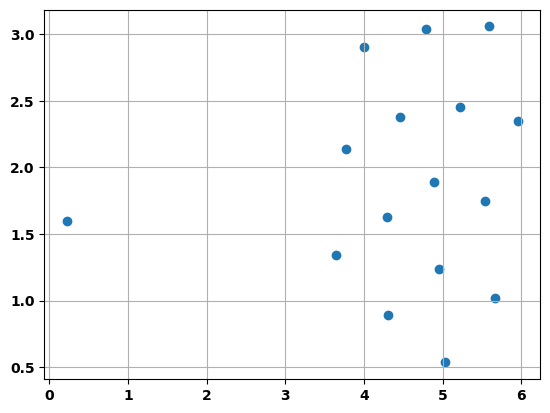

In [80]:
#plt.scatter(x_1[10],y_1[10])
#plt.scatter(x_1[0],y_1[0])
plt.scatter(x_1[-1],y_1[-1])
#plt.scatter(x_1[19],y_1[19])

plt.grid(True)
print(len(x_1))
#print(x_1[0])
print(x_1[0])
print(x_1[10])

Text(0.5, 1.0, 'Potential energy evolution of part b')

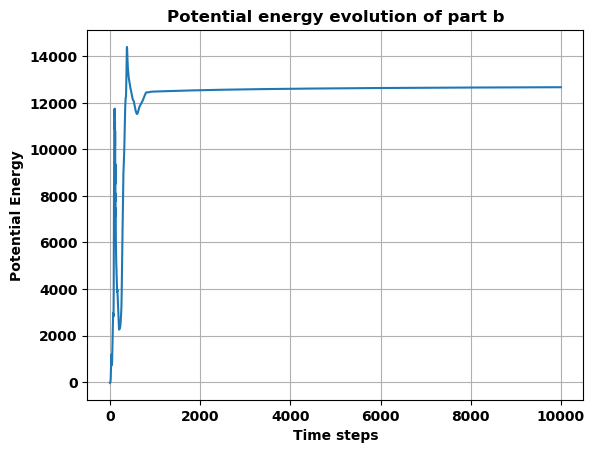

In [81]:
plt.plot(u_1)
plt.grid(True)
plt.xlabel('Time steps')
plt.ylabel('Potential Energy')
plt.title('Potential energy evolution of part b')

0.07447867139240685


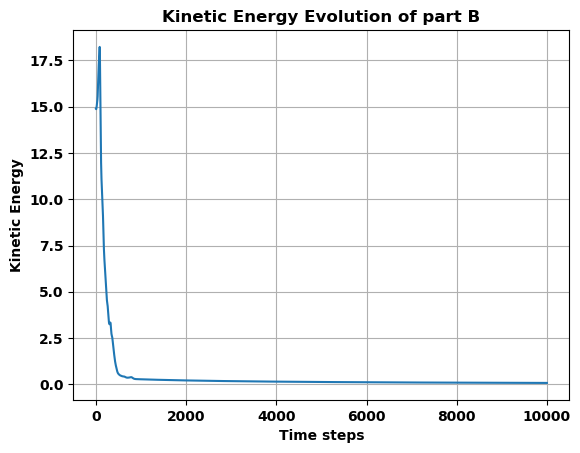

In [82]:
plt.plot(k_1)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy Evolution of part B")
print(k_1[-1])
#plt.xlim(0,1000)

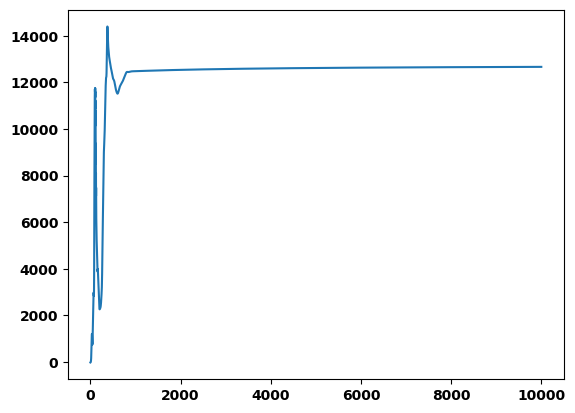

In [83]:
E_tot=[]
for i in range(0,len(k_1)):
    E_tot.append(k_1[i]+u_1[i])
plt.plot(E_tot)

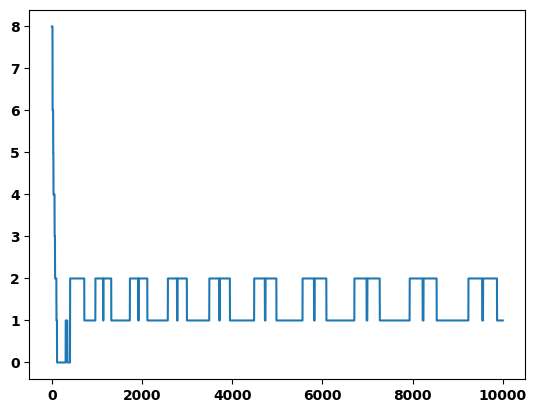

In [84]:
plt.plot(l_1)

In [85]:
l_a=[]
for i in range(0,len(l_1)):
    l_a.append(np.average(l_1[0:i]))


1.4685468546854685


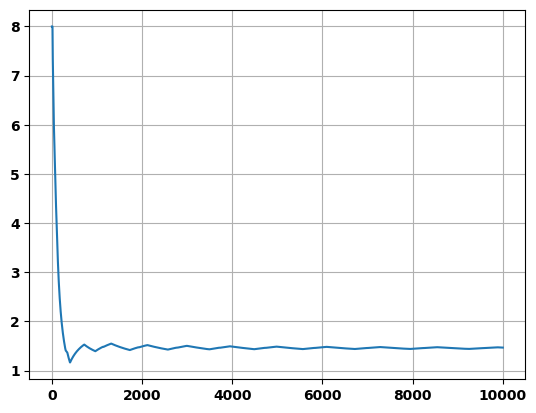

In [86]:
plt.plot(l_a)
print(l_a[-1])
#plt.ylim(1,2)
plt.grid(True)
#plt.axhline(y=1.5)


Text(0.5, 1.0, 'Illustration of late time state with additional cells added')

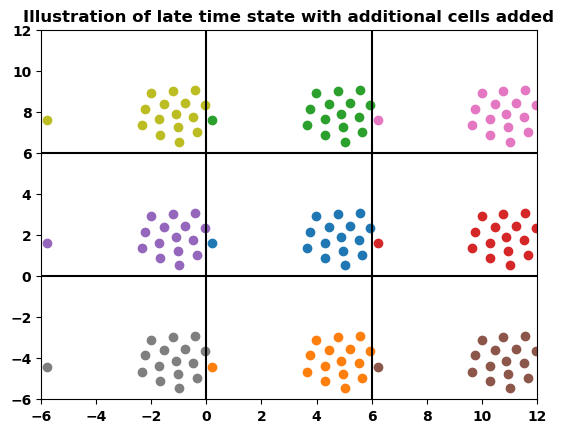

In [87]:
test=-1
plt.scatter(x_1[test],y_1[test])
plt.scatter(x_1[test],[m-6 for m in y_1[test]])
plt.scatter(x_1[test],[m+6 for m in y_1[test]])
plt.scatter([m+6 for m in x_1[test]],y_1[test])
plt.scatter([m-6 for m in x_1[test]],y_1[test])
plt.scatter([m+6 for m in x_1[test]],[m-6 for m in y_1[test]])
plt.scatter([m+6 for m in x_1[test]],[m+6 for m in y_1[test]])
plt.scatter([m-6 for m in x_1[test]],[m-6 for m in y_1[test]])
plt.scatter([m-6 for m in x_1[test]],[m+6 for m in y_1[test]])
plt.axvline(x=6,color='black')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.axhline(y=6,color='black')
plt.xlim(-6,12)
plt.ylim(-6,12)
plt.title("Illustration of late time state with additional cells added")

## D ##

In [88]:
x_D0=[]
y_D0=[]
vx_D0=[]
vy_D0=[]
lDx=lDy=10
#print(*range(1,12))
for i in range(1,12):
    x_D0.append(lDx/2)
    y_D0.append((i-0.5)*(lDy/11))
    vx_D0.append(1)
    vy_D0.append(0)
print(len(x_D0))
print(y_D0)

11
[0.45454545454545453, 1.3636363636363635, 2.2727272727272725, 3.1818181818181817, 4.090909090909091, 5.0, 5.909090909090909, 6.818181818181818, 7.727272727272727, 8.636363636363637, 9.545454545454545]


In [89]:
u_D,k_D,l_D,x_D,y_D,vx_D,vy_D=Mover(x_D0,y_D0,vx_D0,vy_D0,100,dt=0.01,L=lDx)

(0.0, 10.0)

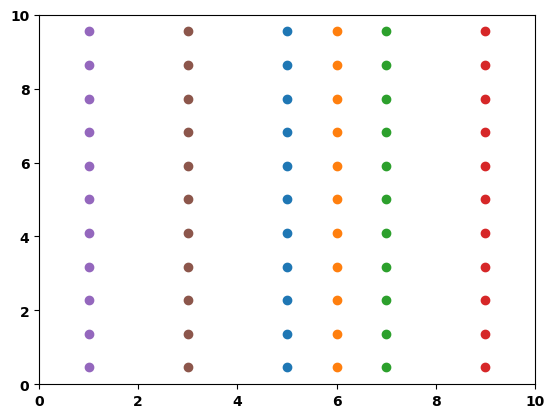

In [90]:
plt.scatter(x_D[0],y_D[0])
plt.scatter(x_D[100],y_D[100])
plt.scatter(x_D[200],y_D[200])
plt.scatter(x_D[400],y_D[400])
plt.scatter(x_D[600],y_D[600])
plt.scatter(x_D[800],y_D[800])
plt.xlim(0,10)
plt.ylim(0,10)

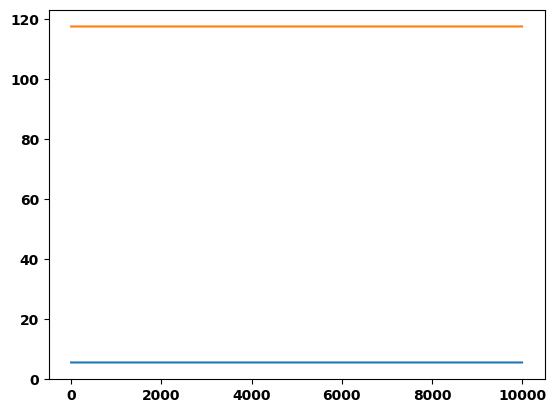

In [91]:
plt.plot(k_D)
plt.plot(u_D)

(0.9499999999999991, 1.05)

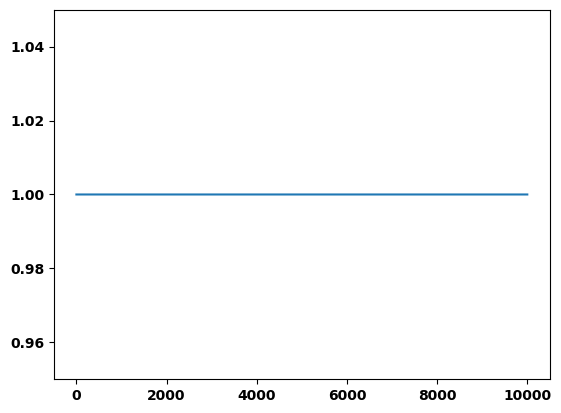

In [92]:
#plt.plot([el[1] for el in vx_D])
plt.plot([el[1] for el in vx_D])
plt.ylim(0.999999999999999,1.0000000000000001)
#print(len(vx_D[1][:]))
#print(np.shape(vx_D[1]))
#print(len([el[1] for el in vx_D]))

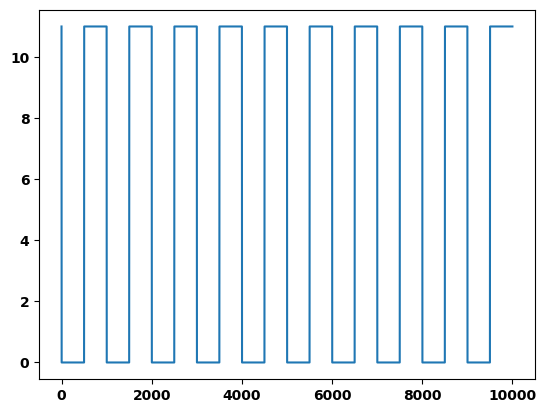

In [93]:
plt.plot(l_D)

In [94]:
x_D0a=x_D0[:]
y_D0a=y_D0[:]
vx_D0a=vx_D0[:]
vy_D0a=vy_D0[:]
print(len(x_D0a))
print(len(x_D0))
vx_D0a[5]=0.99
vy_D0a[5]=0.01
print(vy_D0a)


11
11
[0, 0, 0, 0, 0, 0.01, 0, 0, 0, 0, 0]


In [95]:
u_Da,k_Da,l_Da,x_Da,y_Da,vx_Da,vy_Da=Mover(x_D0a,y_D0a,vx_D0a,vy_D0a,100,dt=0.01,L=lDx)

(0.0, 10.0)

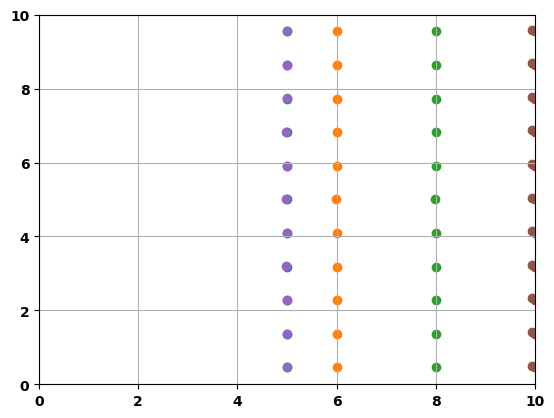

In [96]:
plt.scatter(x_Da[0],y_Da[0])
plt.scatter(x_Da[100],y_Da[100])
plt.scatter(x_Da[300],y_Da[300])
plt.scatter(x_Da[500],y_Da[500])
plt.scatter(x_Da[1000],y_Da[1000])
plt.scatter(x_Da[5500],y_Da[5500])
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,10)

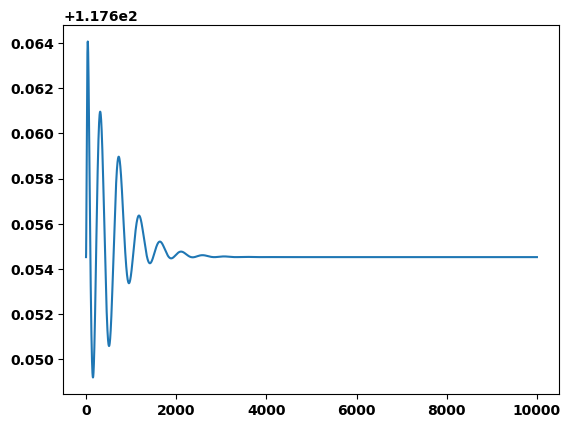

In [97]:
plt.plot(u_Da)

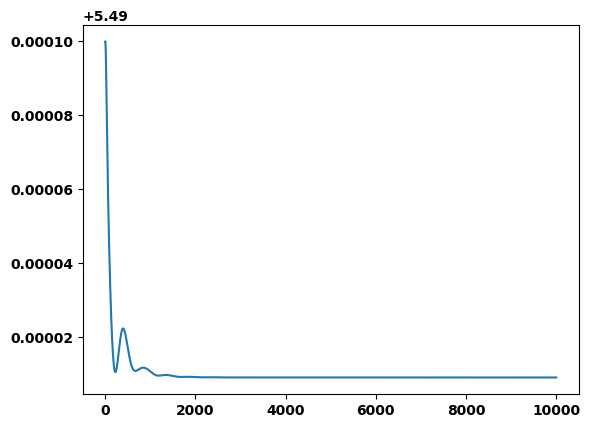

In [98]:
plt.plot(k_Da)

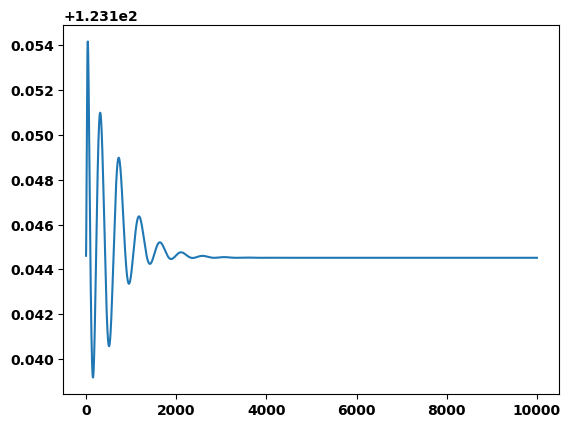

In [99]:
E_tota=[]
for i in range(0,len(k_Da)):
    E_tota.append(k_Da[i]+u_Da[i])
plt.plot(E_tota)

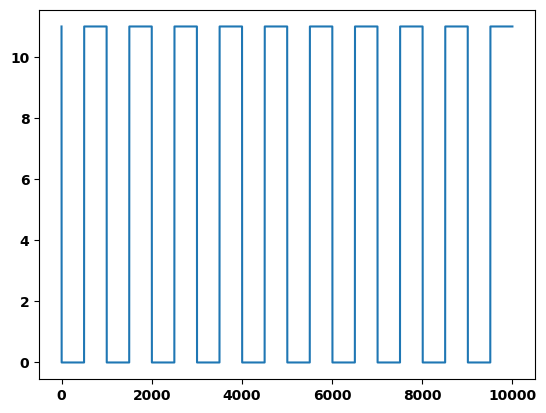

In [100]:
plt.plot(l_Da)

0.0009091231766735497


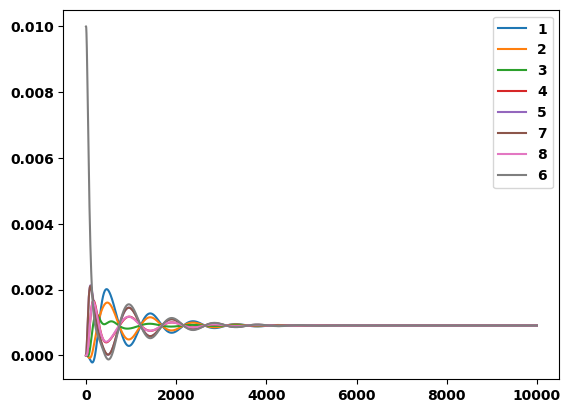

In [101]:
plt.plot([el[0] for el in vy_Da],label='1')
plt.plot([el[1] for el in vy_Da],label='2')
plt.plot([el[2] for el in vy_Da],label='3')
plt.plot([el[3] for el in vy_Da],label='4')
#plt.xlim(0,4000)
plt.plot([el[4] for el in vy_Da],label='5')
plt.plot([el[6] for el in vy_Da],label='7')
plt.plot([el[7] for el in vy_Da],label='8')
plt.plot([el[5] for el in vy_Da],label='6')
plt.legend()
#plt.ylim(-0.0003,0.0022)
#plt.plot([el[7] for el in vy_Da])
print(vy_Da[-1][0])
#Conservation of momentum
#5 and 7 with the highest initial amplitude which makes sense as nearest, basically on top of eachother
#Not repeated further as can see the effective mirror symmetry around 6

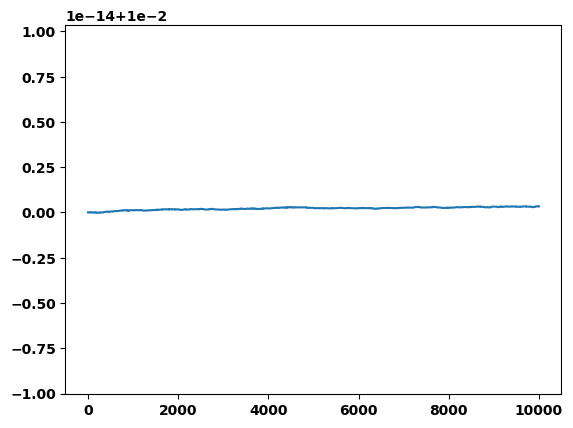

In [102]:
plt.plot([np.sum(el) for el in vy_Da])
#Clearer graph of conservation of momentum

## E ##

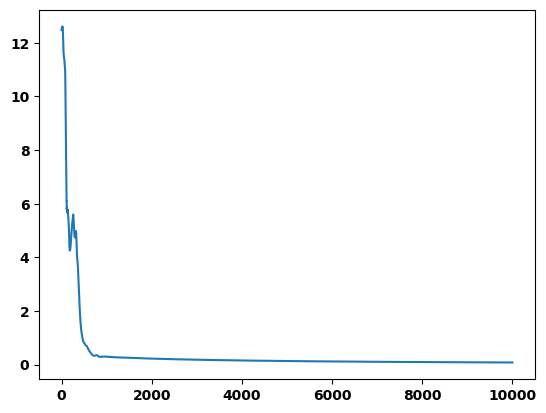

In [103]:
#From above results equilibrium is after 600 steps, fall in kinetic energy flattens out around then
Temp=[]
for i in range(0,len(vx_1)):
    dummylist=[]
    for j in range(0,len(vx_1[i])):
        prod=(1/14)*(vx_1[i][j])**2+(vy_1[i][j])**2
        dummylist.append(prod)
    Temp.append(np.sum(dummylist))
plt.plot(Temp)

[nan, 0.13344535167645188, 0.1334363712208457, 0.1334273923799477, 0.13341841515326724, 0.13340943954031412, 0.13340046554059815, 0.13339149315362944, 0.1333825223789183, 0.13337355321597527, 0.13336458566431106, 0.13335561972343662, 0.1333466553928631, 0.13333769267210188, 0.13332873156066455, 0.13331977205806286, 0.1333108141638088, 0.1333018578774146, 0.13329290319839274, 0.13328395012625577, 0.13327499866051656, 0.13326604880068818, 0.13325710054628387, 0.1332481538968171, 0.13323920885180157, 0.13323026541075114, 0.13322132357317995, 0.13321238333860227, 0.13320344470653264, 0.13319450767648583, 0.1331855722479767, 0.13317663842052047, 0.1331677061936324, 0.13315877556682817, 0.1331498465396235, 0.13314091911153436, 0.13313199328207698, 0.1331230690507677, 0.13311414641712319, 0.13310522538066022, 0.13309630594089583, 0.13308738809734724, 0.13307847184953192, 0.13306955719696753, 0.13306064413917185, 0.133051732675663, 0.13304282280595925, 0.13303391452957902, 0.13302500784604107,

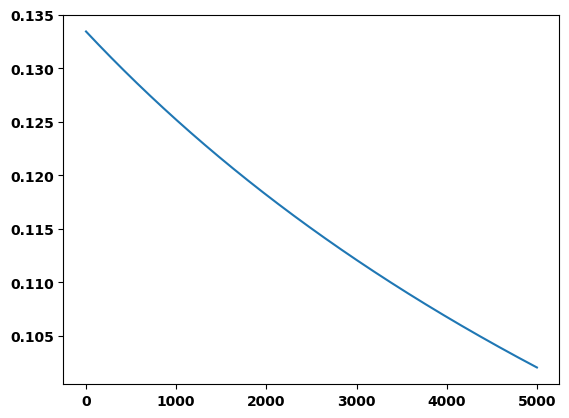

In [104]:
Red_Avg_temp=[]
for i in range (5000,len(Temp)):
    Red_Avg_temp.append(np.average(Temp[5000:i]))
print(Red_Avg_temp)
plt.plot(Red_Avg_temp)

0.10206296801216753


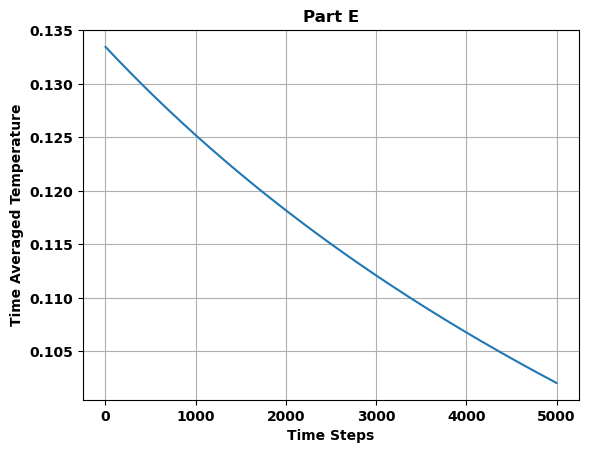

In [105]:
plt.plot(Red_Avg_temp)
plt.xlabel("Time Steps")
plt.ylabel("Time Averaged Temperature")
plt.grid(True)
plt.title("Part E")
print(Red_Avg_temp[-1])

In [106]:
v_avg=[]
for i in range(5000,len(vx_1)):
    dummy_vels=[]
    for j in range(0,len(vx_1[i])):
        v=np.sqrt(vx_1[i][j]**2+vy_1[i][j]**2)
        dummy_vels.append(v)
    v_avg.append(dummy_vels)
print(np.shape(v_avg))

(5000, 16)


80000


(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2625., 5810., 5000., 4330., 3775., 3315.,  145.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  420., 3585., 3275., 3010.,
        2770., 2550., 3425., 5200., 4830., 4480., 3370., 2255., 2110.,
        1975., 1850., 1730., 1630., 1535.]),
 array([1.56966989e-16, 3.19285542e-03, 6.38571084e-03, 9.57856626e-03,
        1.27714217e-02, 1.59642771e-02, 1.91571325e-02, 2.23499879e-02,
        2.55428434e-02, 2.87356988e-02, 3.19285542e-02, 3.51214096e-02,
        3.83142650e-02, 4.15071205e-02, 4.46999759e-02, 4.78928313e-02,
        5.10856867e-02, 5.42785421e-02, 5.74713976e-02, 6.06642530e-02,
        6.38571084e-02, 6.70499638e-02, 7.02428192e-02, 7.34356747e-02,
        7.66285301e-02, 7.98213855e-02, 8.30142409e-02, 8.62070963e-02,
        8.93999518e-02, 9.25928072e-02, 9.57856626e-02, 9.89785180e-02,
        1.02171373e-01, 

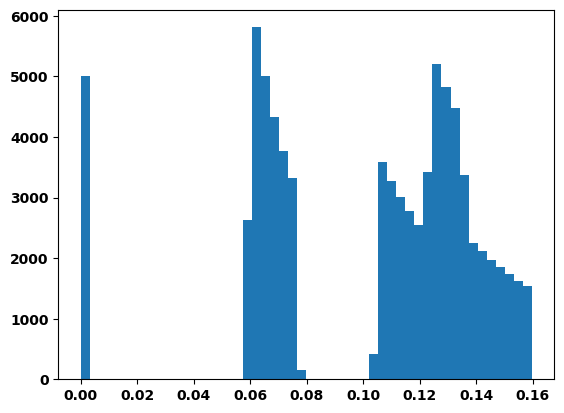

In [107]:
v_avgn=np.asarray(v_avg)
print(len(v_avgn.flatten()))
plt.hist(v_avgn.flatten(),50)

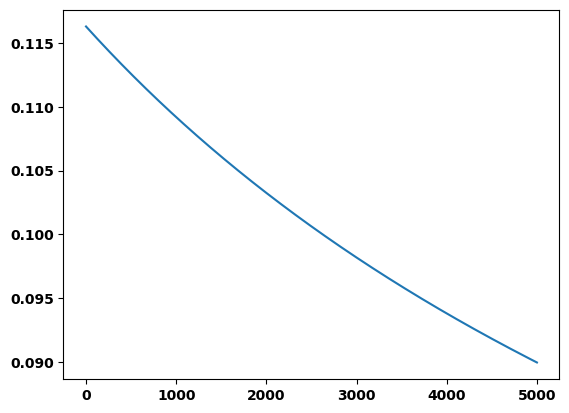

In [108]:
plt.plot([np.average(el) for el in v_avg])